# IBM Q: HELLO WORLD

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="e8f013945d62820c91250afae31a8c9469fe92b2de6bab1475bee313903785d6373bed9ce8563b1f3b745f3b2685f9d51691c47daa075e306d94da2cd1f8fdd2")

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="e8f013945d62820c91250afae31a8c9469fe92b2de6bab1475bee313903785d6373bed9ce8563b1f3b745f3b2685f9d51691c47daa075e306d94da2cd1f8fdd2", set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [7]:
 from qiskit import QuantumCircuit
 from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
 # Create empty circuit
 example_circuit = QuantumCircuit(2)
 example_circuit.measure_all()
 
 # You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
 service = QiskitRuntimeService()
 backend = service.backend("ibmq_qasm_simulator")
 job = Sampler(backend).run(example_circuit)
 print(f"job id: {job.job_id()}")
 result = job.result()
 print(result)

job id: clskpcoiidfp3mfu56l0
SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


/Users/pcchen/miniforge3/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


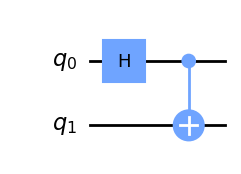

In [8]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [9]:
from qiskit.quantum_info import Pauli
 
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
 
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([0.00457503, 0.01746831, 0.03513419, 0.02001832, 0.99952671,
       0.99824909]), metadata=[{'variance': 1.084585070331764, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.084300859309003, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.0452475778891648, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.0460812563897854, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.1381317645074679, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'reado

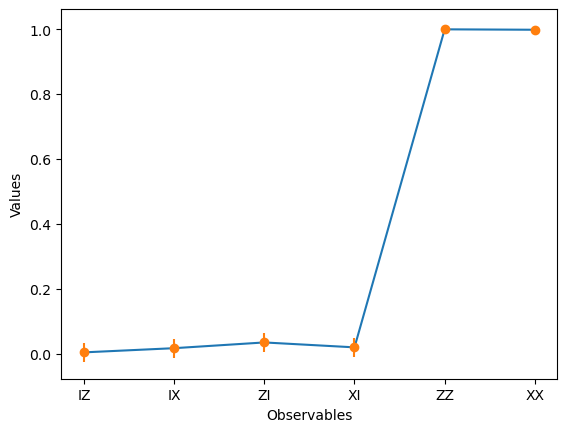

In [11]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
 
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
# backend = service.least_busy(simulator=False, operational=True)
# Run on a simulator
backend = service.get_backend("ibmq_qasm_simulator")

options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([ 0.01757188, -0.00678914, -0.00479233,  0.00838658,  1.        ,
        1.        ]), metadata=[{'variance': 0.9996912288581081, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9999539076136329, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9999770335514295, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9999296652512529, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_miti

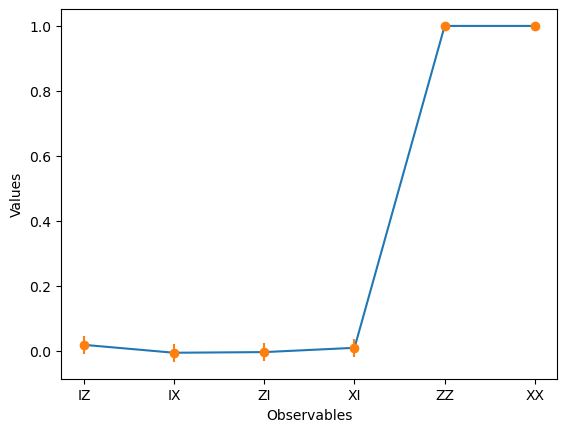

In [14]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()